In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
import params
import model
import convert
import stimulus
import matplotlib.pyplot as plt
import jax
import jax.numpy as np

# Experiments 
---

Parameters that works are:
- field_size = (12, 12)
- d = 0.001
- dx = 0.03
- dt = 0.01
- Convert field to shape
- Do not scale parameters and stimuli


## 1. Non chaotic
### 1.1 Stability
Testing the stability of a non chaotic simulations with two rectangular stimuli, delayed by 15000 time steps.

#### Settings
```python
field_size = (12, 12)  # cm
d = 0.001  # (cm^2/ms)
cell_parameters = params.params1a()
dx = 0.01  # (cm/units) - Fenton 1998 recommends ~200, 300 micron/gridunit (~0.02, 0.03), smaller dx means finer grid
dt = 0.01  # (ms) - Fenton 1998 recommends few hundreds of ms (~0.01, 0.04)
shape = convert.field_to_shape(field_size, dx)
protocol1 = stimulus.protocol(start=0, duration=2, period=0)
s1 = stimulus.rectangular(shape, jax.ops.index[-20:, :], 1., protocol1)
protocol2 = stimulus.protocol(start=15000, duration=2, period=0)
s2 = stimulus.rectangular(shape, jax.ops.index[:, -20:], 1., protocol2)
```
#### Results

| dx    | Stable | Quality                    |
|-------|--------|----------------------------|
| 0.08  | NO     | /                          |
| 0.05  | NO     | /                          |
| 0.04  | YES    | UNUSABLE                   |
| 0.03  | YES    | ACCEPTABLE                 |
| 0.025 | YES    | ACCEPTABLE                 |
| 0.02  | YES    | ACCEPTABLE AND SMOOTH      |
| 0.015 | YES    | ACCEPTABLE AND VERY SMOOTH |
| 0.01  | YES    | ACCEPTABLE AND VERY SMOOTH |

## 1.1.1 Non chaotic

In [5]:
# infinitesimals
dx = 0.01  # (cm/units) - Fenton 1998 recommends ~200, 300 micron/gridunit (~0.02, 0.03), smaller dx means finer grid
dt = 0.01  # (ms) - Fenton 1998 recommends few hundreds of ms (~0.01, 0.04)

In [6]:
def test_stability_nonchaotic(dx, dt):
    # simulation inputs (real values)
    field_size = (12, 12)  # cm
    d = 0.001  # (cm^2/ms)
    cell_parameters = params.params1a()
    
    # to computational units
    shape = convert.field_to_shape(field_size, dx)

    portion = int(shape[0] / 10)

    protocol1 = stimulus.protocol(start=0, duration=2, period=0)
    s1 = stimulus.rectangular(shape, jax.ops.index[-portion:, :], 1., protocol1)

    protocol2 = stimulus.protocol(start=15000, duration=2, period=0)
    s2 = stimulus.rectangular(shape, jax.ops.index[:, -portion:], 1., protocol2)

    stimuli = [s1, s2]
    model.show_stimuli(*stimuli)
    print("Testing dx:", dx_test)
    print("Real tissue size:", field_size, "\tUnits:", shape)
    print("Parameters:\n", cell_parameters)
    model.show_stimuli(*stimuli)
    
    checkpoints = [0, 10000, 15000, 30000, 60000, 100000]
    state = model.init(shape)
    for i in range(len(checkpoints) - 1):
        state = model._forward(state, checkpoints[i], checkpoints[i + 1], cell_parameters, np.ones(shape) * d, stimuli, dt, dx)
        print("\t-Iteration:", checkpoints[i + 1])
        model.show(state)
    return state

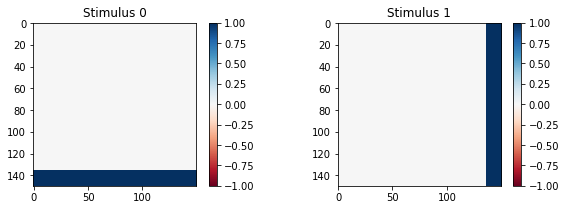

Testing dx: 0.08
Real tissue size: (12, 12) 	Units: (150, 150)
Parameters:
 {'tau_v_plus': 3.33, 'tau_v1_minus': 19.6, 'tau_v2_minus': 1000, 'tau_w_plus': 667, 'tau_w_minus': 11, 'tau_d': 0.41, 'tau_0': 8.3, 'tau_r': 50, 'tau_si': 45, 'k': 10, 'V_csi': 0.85, 'V_c': 0.13, 'V_v': 0.0055, 'Cm': 1}


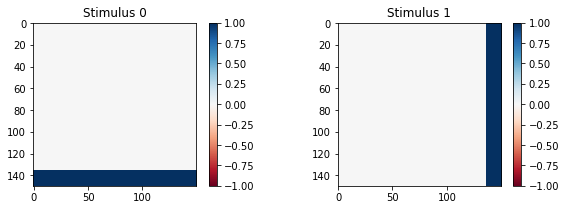

	-Iteration: 10000


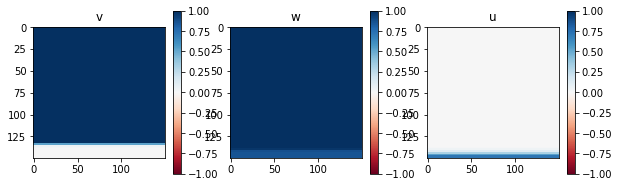

	-Iteration: 15000


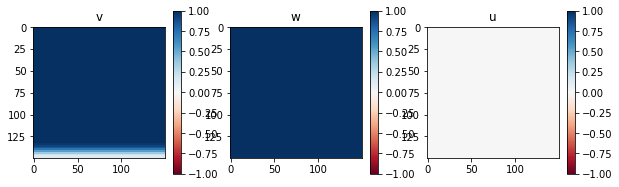

	-Iteration: 30000


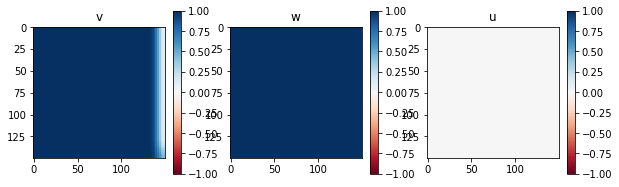

	-Iteration: 60000


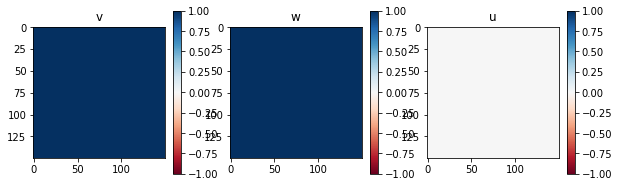

	-Iteration: 100000


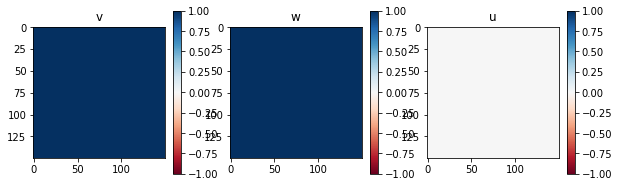

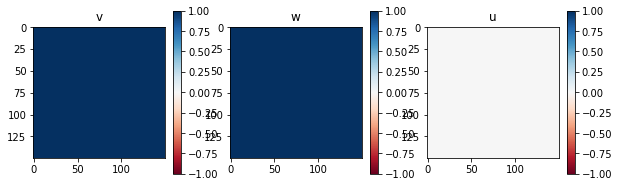

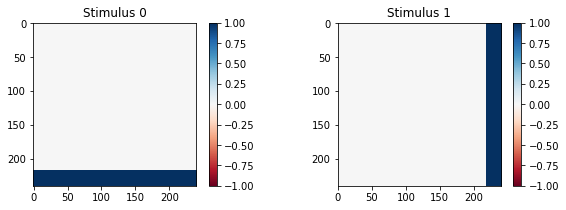

Testing dx: 0.05
Real tissue size: (12, 12) 	Units: (240, 240)
Parameters:
 {'tau_v_plus': 3.33, 'tau_v1_minus': 19.6, 'tau_v2_minus': 1000, 'tau_w_plus': 667, 'tau_w_minus': 11, 'tau_d': 0.41, 'tau_0': 8.3, 'tau_r': 50, 'tau_si': 45, 'k': 10, 'V_csi': 0.85, 'V_c': 0.13, 'V_v': 0.0055, 'Cm': 1}


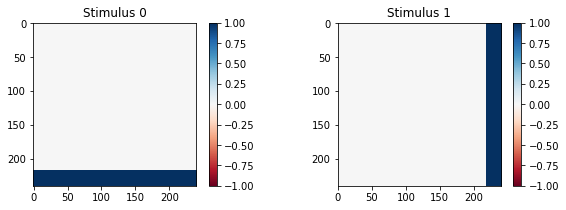

	-Iteration: 10000


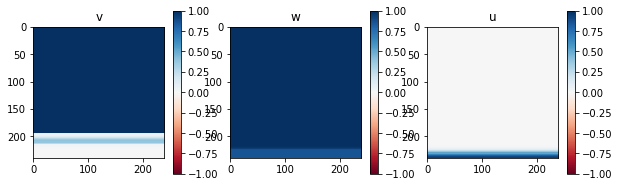

	-Iteration: 15000


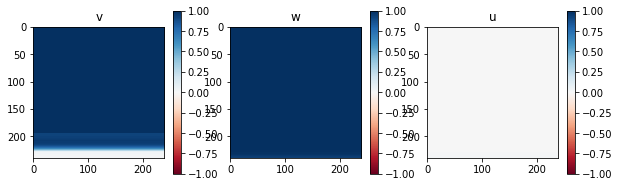

	-Iteration: 30000


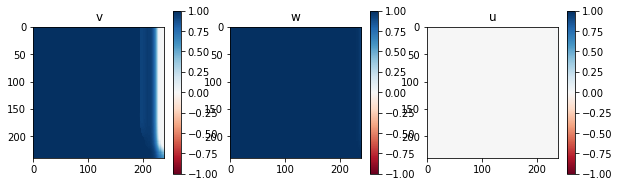

	-Iteration: 60000


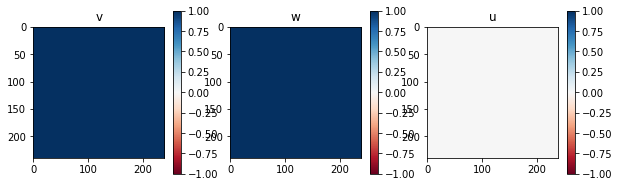

	-Iteration: 100000


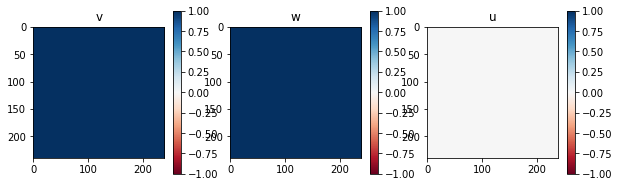

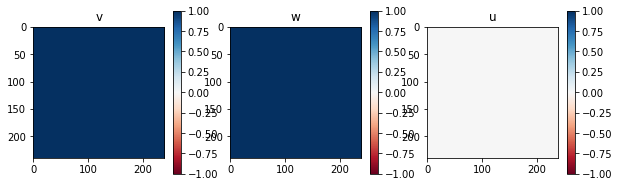

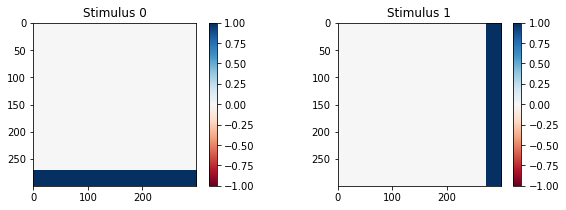

Testing dx: 0.04
Real tissue size: (12, 12) 	Units: (300, 300)
Parameters:
 {'tau_v_plus': 3.33, 'tau_v1_minus': 19.6, 'tau_v2_minus': 1000, 'tau_w_plus': 667, 'tau_w_minus': 11, 'tau_d': 0.41, 'tau_0': 8.3, 'tau_r': 50, 'tau_si': 45, 'k': 10, 'V_csi': 0.85, 'V_c': 0.13, 'V_v': 0.0055, 'Cm': 1}


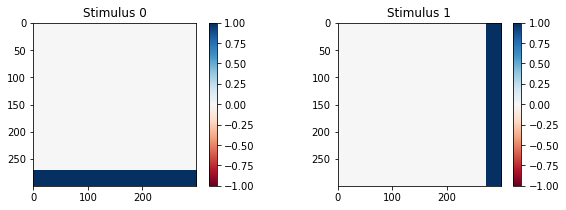

	-Iteration: 10000


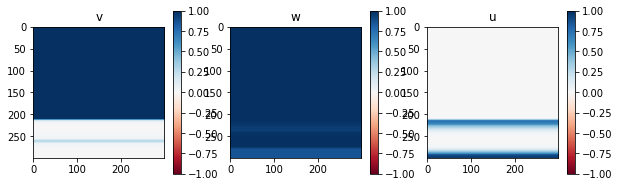

	-Iteration: 15000


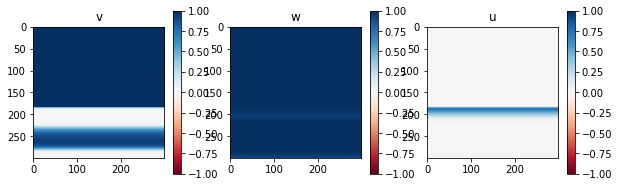

	-Iteration: 30000


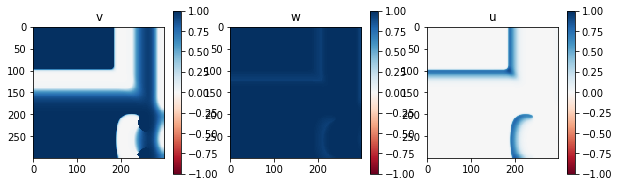

	-Iteration: 60000


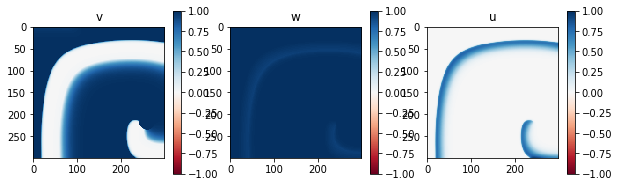

	-Iteration: 100000


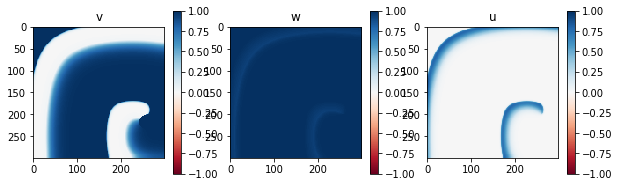

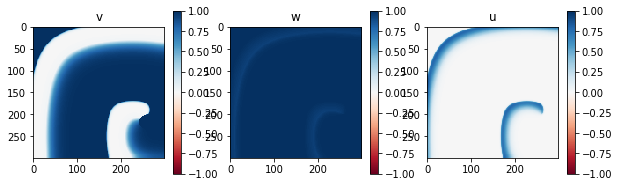

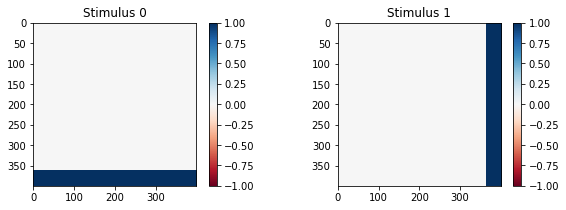

Testing dx: 0.03
Real tissue size: (12, 12) 	Units: (400, 400)
Parameters:
 {'tau_v_plus': 3.33, 'tau_v1_minus': 19.6, 'tau_v2_minus': 1000, 'tau_w_plus': 667, 'tau_w_minus': 11, 'tau_d': 0.41, 'tau_0': 8.3, 'tau_r': 50, 'tau_si': 45, 'k': 10, 'V_csi': 0.85, 'V_c': 0.13, 'V_v': 0.0055, 'Cm': 1}


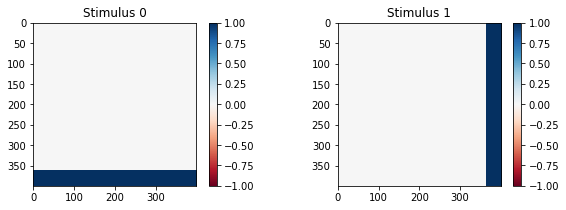

	-Iteration: 10000


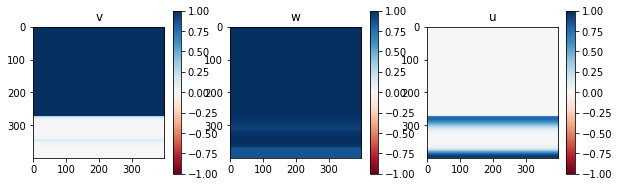

	-Iteration: 15000


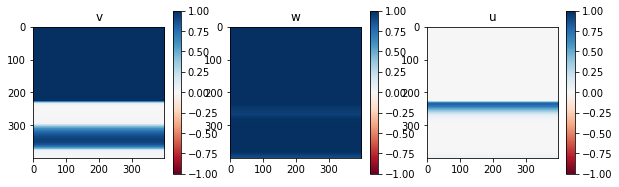

	-Iteration: 30000


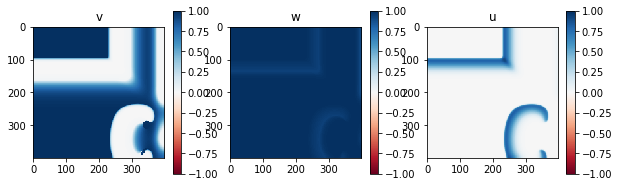

	-Iteration: 60000


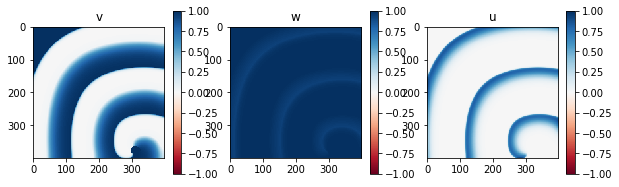

	-Iteration: 100000


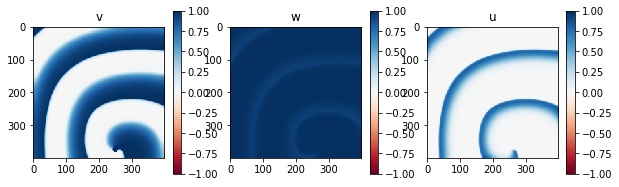

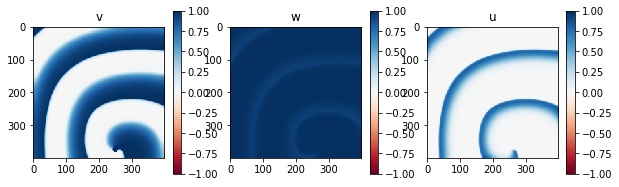

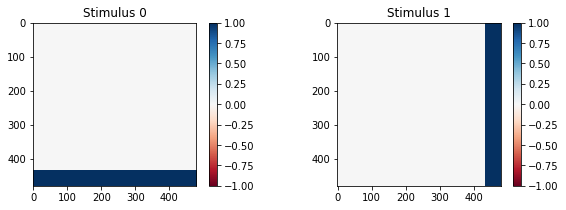

Testing dx: 0.025
Real tissue size: (12, 12) 	Units: (480, 480)
Parameters:
 {'tau_v_plus': 3.33, 'tau_v1_minus': 19.6, 'tau_v2_minus': 1000, 'tau_w_plus': 667, 'tau_w_minus': 11, 'tau_d': 0.41, 'tau_0': 8.3, 'tau_r': 50, 'tau_si': 45, 'k': 10, 'V_csi': 0.85, 'V_c': 0.13, 'V_v': 0.0055, 'Cm': 1}


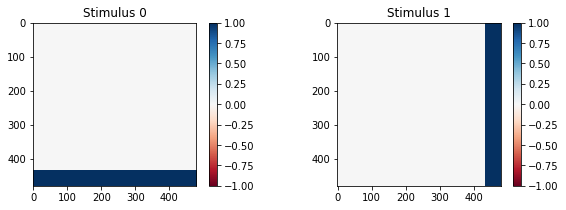

	-Iteration: 10000


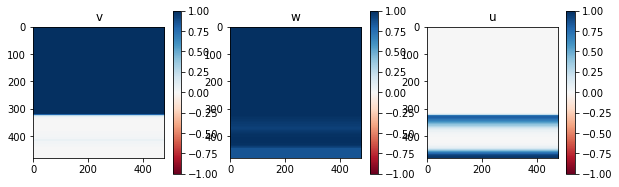

	-Iteration: 15000


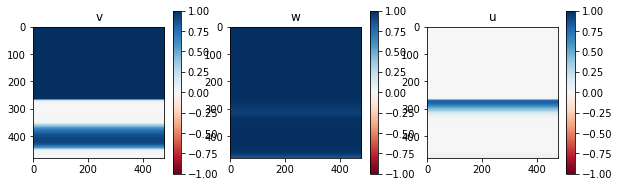

	-Iteration: 30000


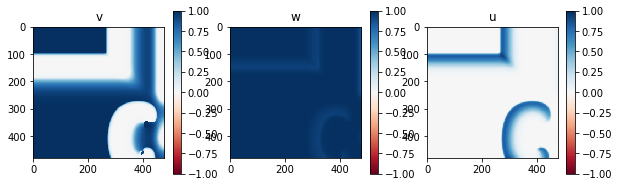

	-Iteration: 60000


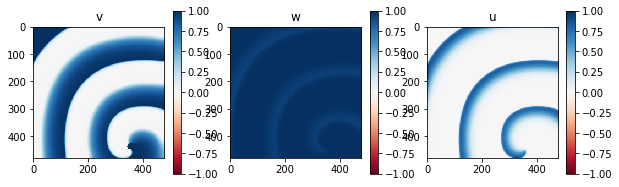

	-Iteration: 100000


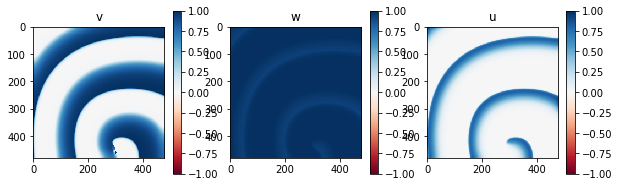

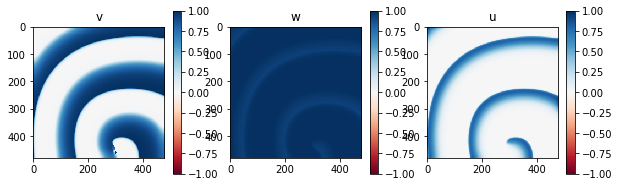

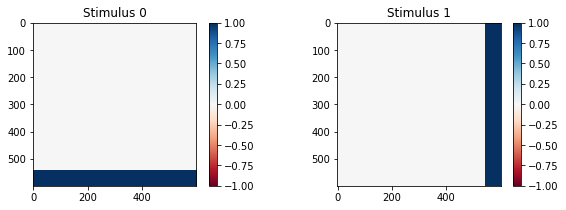

Testing dx: 0.02
Real tissue size: (12, 12) 	Units: (600, 600)
Parameters:
 {'tau_v_plus': 3.33, 'tau_v1_minus': 19.6, 'tau_v2_minus': 1000, 'tau_w_plus': 667, 'tau_w_minus': 11, 'tau_d': 0.41, 'tau_0': 8.3, 'tau_r': 50, 'tau_si': 45, 'k': 10, 'V_csi': 0.85, 'V_c': 0.13, 'V_v': 0.0055, 'Cm': 1}


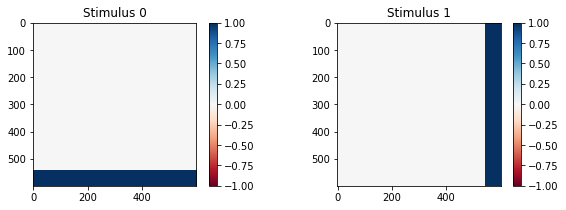

	-Iteration: 10000


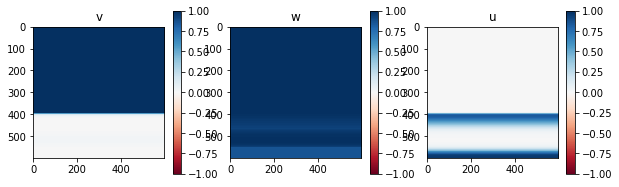

	-Iteration: 15000


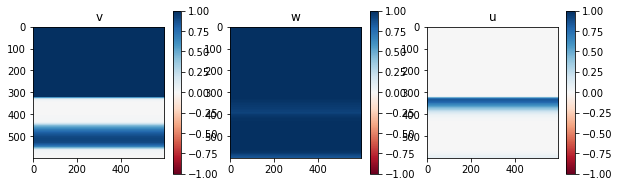

	-Iteration: 30000


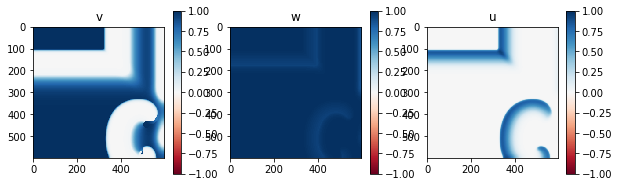

	-Iteration: 60000


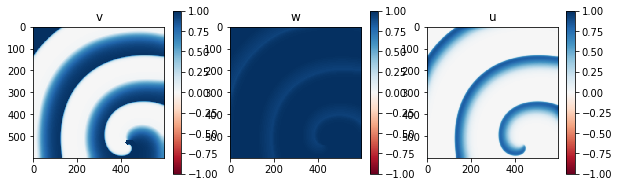

	-Iteration: 100000


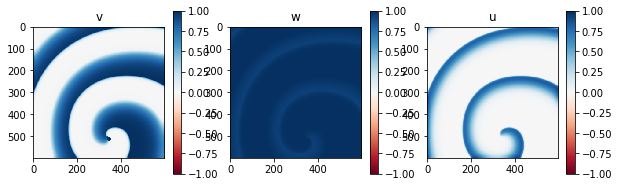

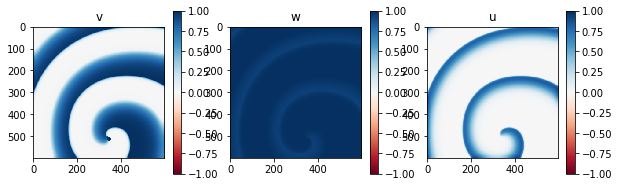

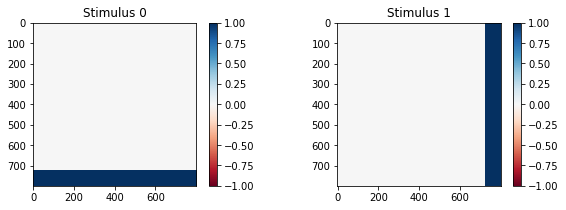

Testing dx: 0.015
Real tissue size: (12, 12) 	Units: (800, 800)
Parameters:
 {'tau_v_plus': 3.33, 'tau_v1_minus': 19.6, 'tau_v2_minus': 1000, 'tau_w_plus': 667, 'tau_w_minus': 11, 'tau_d': 0.41, 'tau_0': 8.3, 'tau_r': 50, 'tau_si': 45, 'k': 10, 'V_csi': 0.85, 'V_c': 0.13, 'V_v': 0.0055, 'Cm': 1}


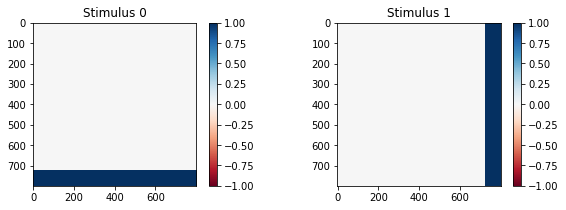

	-Iteration: 10000


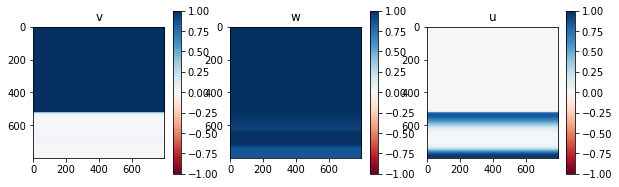

	-Iteration: 15000


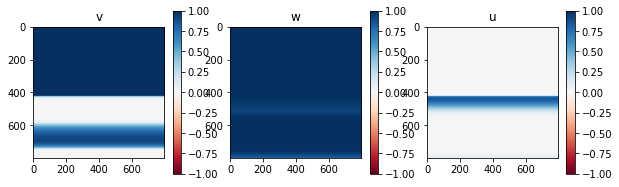

	-Iteration: 30000


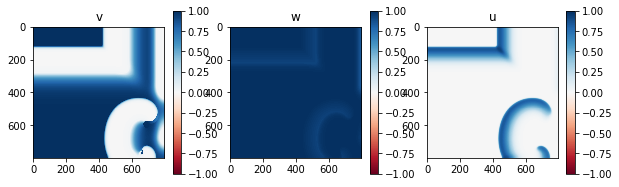

	-Iteration: 60000


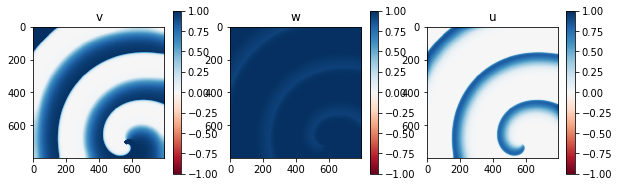

	-Iteration: 100000


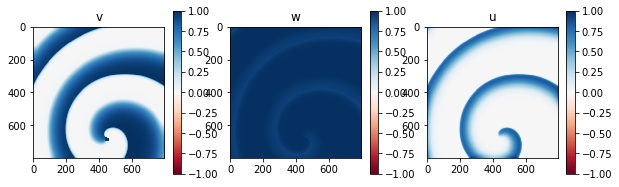

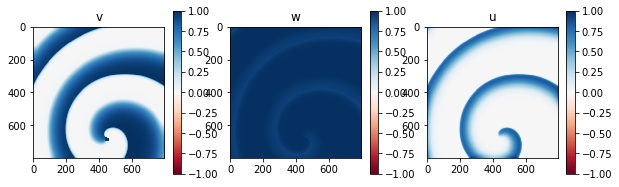

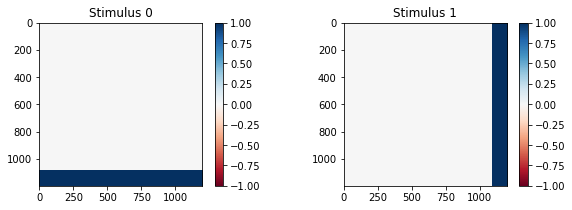

Testing dx: 0.01
Real tissue size: (12, 12) 	Units: (1200, 1200)
Parameters:
 {'tau_v_plus': 3.33, 'tau_v1_minus': 19.6, 'tau_v2_minus': 1000, 'tau_w_plus': 667, 'tau_w_minus': 11, 'tau_d': 0.41, 'tau_0': 8.3, 'tau_r': 50, 'tau_si': 45, 'k': 10, 'V_csi': 0.85, 'V_c': 0.13, 'V_v': 0.0055, 'Cm': 1}


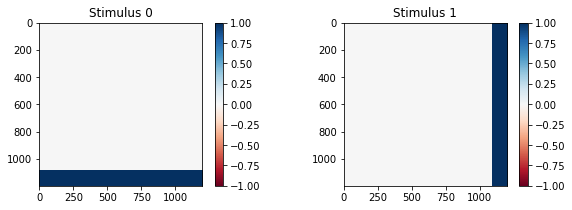

	-Iteration: 10000


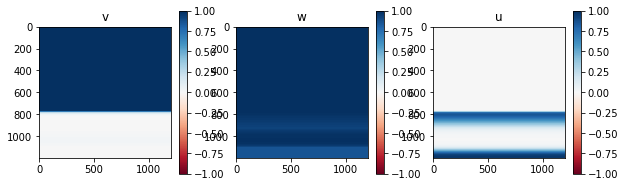

	-Iteration: 15000


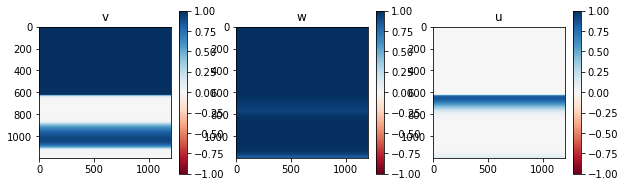

	-Iteration: 30000


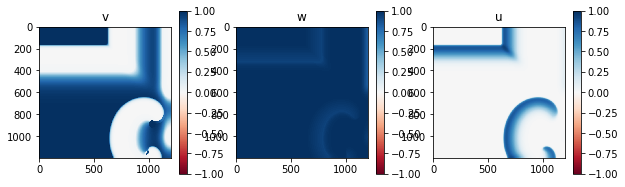

	-Iteration: 60000


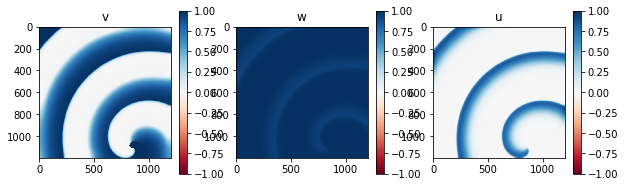

	-Iteration: 100000


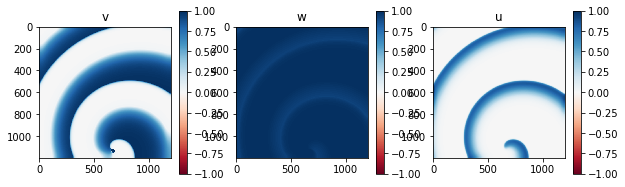

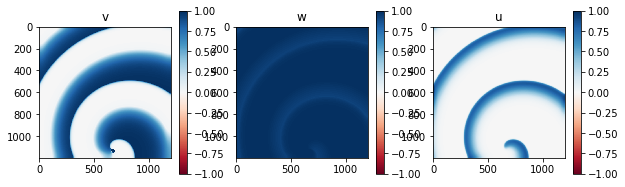

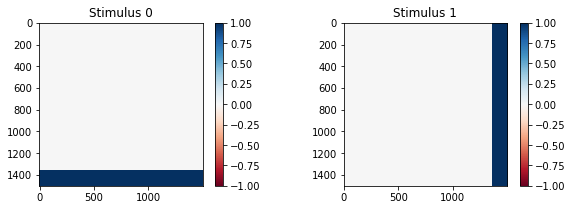

Testing dx: 0.008
Real tissue size: (12, 12) 	Units: (1500, 1500)
Parameters:
 {'tau_v_plus': 3.33, 'tau_v1_minus': 19.6, 'tau_v2_minus': 1000, 'tau_w_plus': 667, 'tau_w_minus': 11, 'tau_d': 0.41, 'tau_0': 8.3, 'tau_r': 50, 'tau_si': 45, 'k': 10, 'V_csi': 0.85, 'V_c': 0.13, 'V_v': 0.0055, 'Cm': 1}


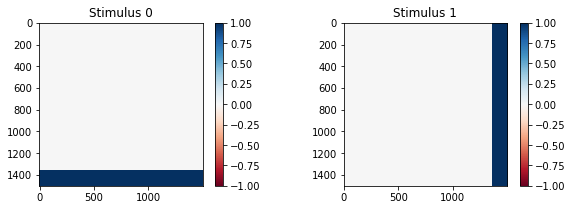

	-Iteration: 10000


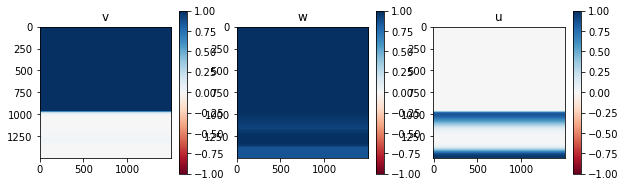

	-Iteration: 15000


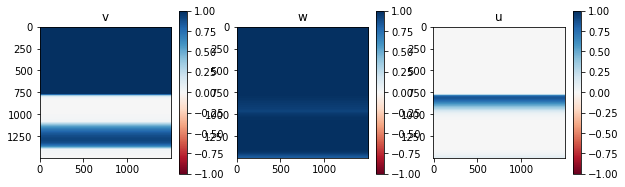

	-Iteration: 30000


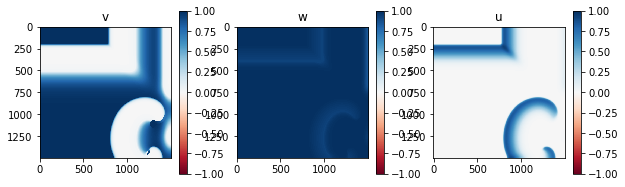

	-Iteration: 60000


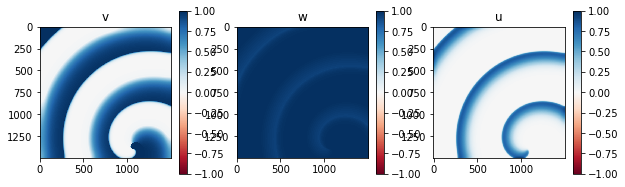

	-Iteration: 100000


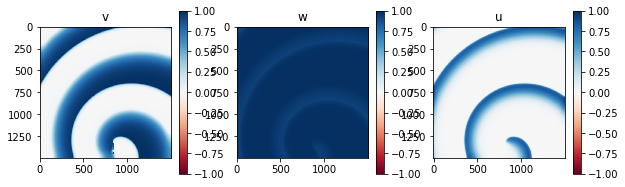

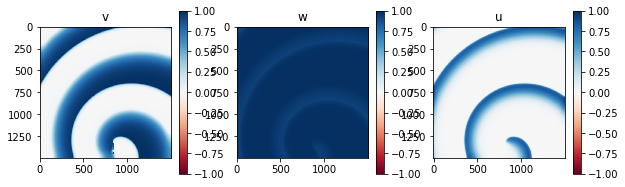

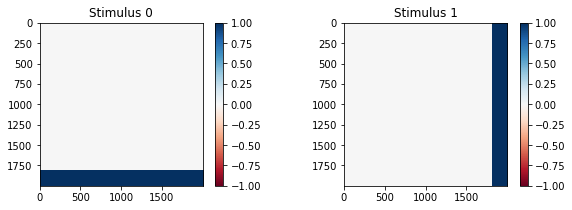

Testing dx: 0.006
Real tissue size: (12, 12) 	Units: (2000, 2000)
Parameters:
 {'tau_v_plus': 3.33, 'tau_v1_minus': 19.6, 'tau_v2_minus': 1000, 'tau_w_plus': 667, 'tau_w_minus': 11, 'tau_d': 0.41, 'tau_0': 8.3, 'tau_r': 50, 'tau_si': 45, 'k': 10, 'V_csi': 0.85, 'V_c': 0.13, 'V_v': 0.0055, 'Cm': 1}


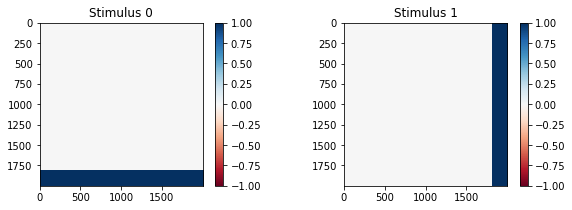

	-Iteration: 10000


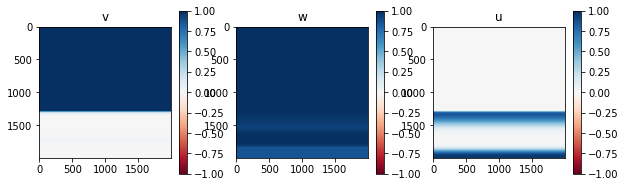

	-Iteration: 15000


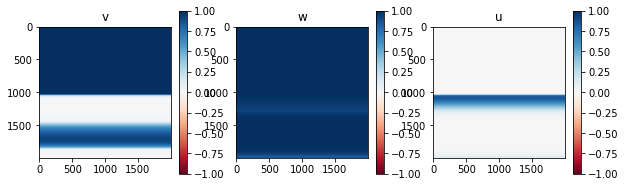

	-Iteration: 30000


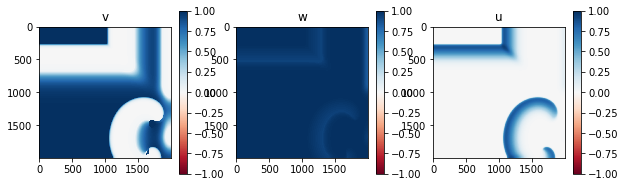

	-Iteration: 60000


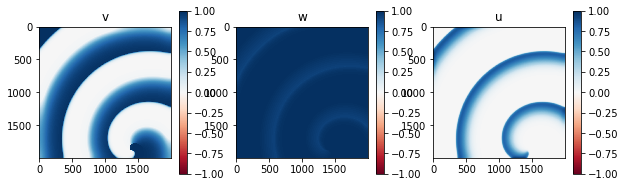

	-Iteration: 100000


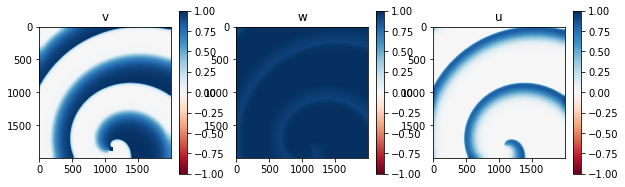

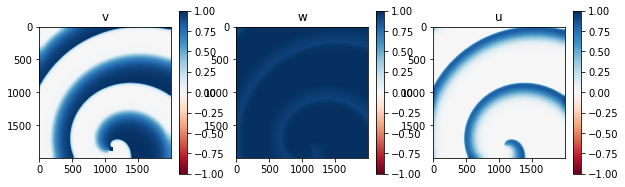

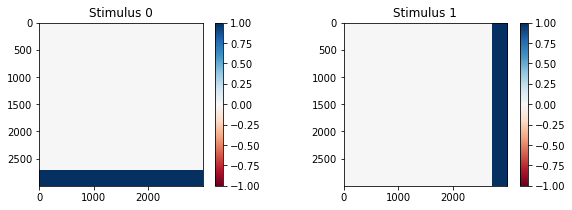

Testing dx: 0.004
Real tissue size: (12, 12) 	Units: (3000, 3000)
Parameters:
 {'tau_v_plus': 3.33, 'tau_v1_minus': 19.6, 'tau_v2_minus': 1000, 'tau_w_plus': 667, 'tau_w_minus': 11, 'tau_d': 0.41, 'tau_0': 8.3, 'tau_r': 50, 'tau_si': 45, 'k': 10, 'V_csi': 0.85, 'V_c': 0.13, 'V_v': 0.0055, 'Cm': 1}


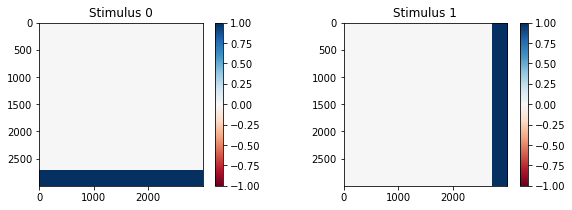

	-Iteration: 10000


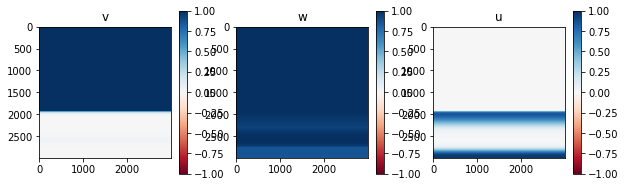

	-Iteration: 15000


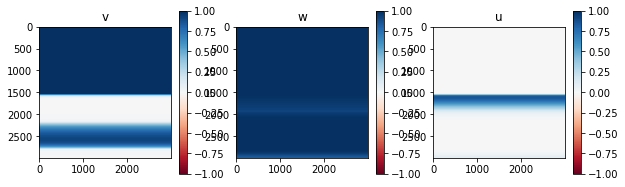

	-Iteration: 30000


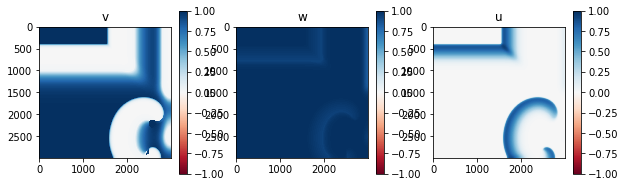

	-Iteration: 60000


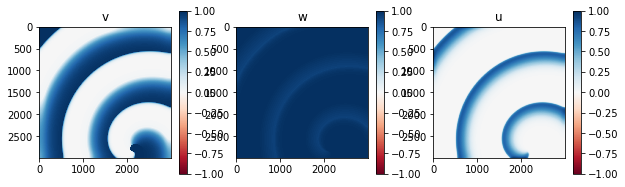

	-Iteration: 100000


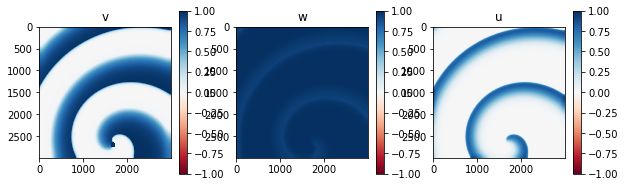

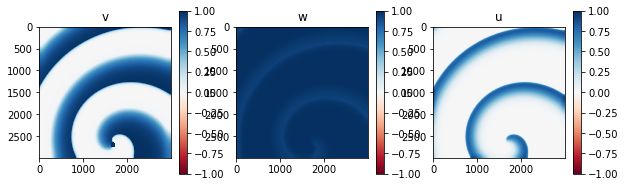

In [7]:
dxs = [0.08, 0.05, 0.04, 0.03, 0.025, 0.02, 0.015, 0.01, 0.008, 0.006, 0.004]

for dx_test in dxs:
    state = test_stability_nonchaotic(dx_test, dt)
    fig, ax = model.show(state)
    path = os.path.join("results", "stability", "nonchaotic", "dx_%.4f.png" % dx_test)
    fig.savefig(path)

In [10]:
def test_stability_chaotic(dx, dt):
    # simulation inputs (real values)
    field_size = (12, 12)  # cm
    d = 0.001  # (cm^2/ms)
    cell_parameters = params.params1a()
    
    # to computational units
    shape = convert.field_to_shape(field_size, dx)

    stripe_size = int(shape[0] / 10)

    protocol1 = stimulus.protocol(start=0, duration=2, period=0)
    s1 = stimulus.rectangular(shape, jax.ops.index[-stripe_size:, :], 1., protocol1)

    protocol2 = stimulus.protocol(start=25000, duration=2, period=0)
    s2 = stimulus.rectangular(shape, jax.ops.index[:, -stripe_size:], 1., protocol2)

    protocol3 = stimulus.protocol(start=20000, duration=2, period=0)
    s3 = stimulus.rectangular(shape, jax.ops.index[stripe_size*2:stripe_size*4, stripe_size*2:stripe_size*4], 1., protocol3)

    protocol4 = stimulus.protocol(start=30000, duration=2, period=0)
    s4 = stimulus.rectangular(shape, jax.ops.index[stripe_size*4:stripe_size*5, :], 1., protocol4)

    stimuli = [s1, s2, s3, s4]
    
    model.show_stimuli(*stimuli)
    print("Testing dx:", dx_test)
    print("Real tissue size:", field_size, "\tUnits:", shape)
    print("Parameters:\n", cell_parameters)
    model.show_stimuli(*stimuli)
    
    checkpoints = [0, 10000, 15000, 30000, 60000, 100000]
    state = model.init(shape)
    for i in range(len(checkpoints) - 1):
        state = model._forward(state, checkpoints[i], checkpoints[i + 1], cell_parameters, np.ones(shape) * d, stimuli, dt, dx)
        print("\t-Iteration:", checkpoints[i + 1])
        model.show(state)
    return state

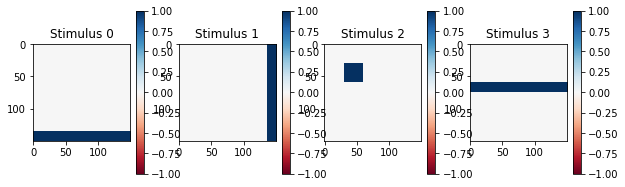

Testing dx: 0.08
Real tissue size: (12, 12) 	Units: (150, 150)
Parameters:
 {'tau_v_plus': 3.33, 'tau_v1_minus': 19.6, 'tau_v2_minus': 1000, 'tau_w_plus': 667, 'tau_w_minus': 11, 'tau_d': 0.41, 'tau_0': 8.3, 'tau_r': 50, 'tau_si': 45, 'k': 10, 'V_csi': 0.85, 'V_c': 0.13, 'V_v': 0.0055, 'Cm': 1}


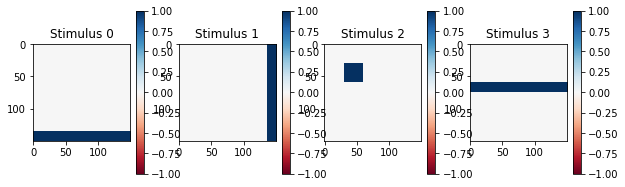

	-Iteration: 10000


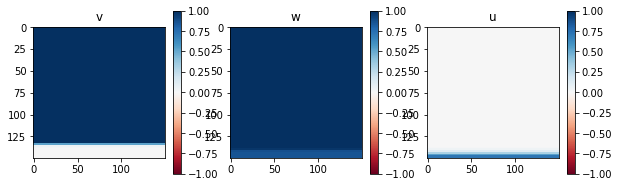

	-Iteration: 15000


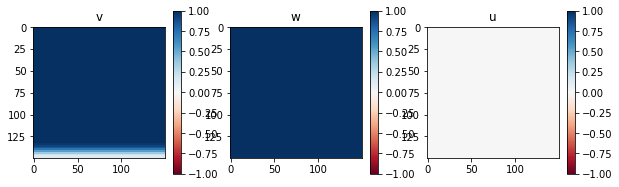

	-Iteration: 30000


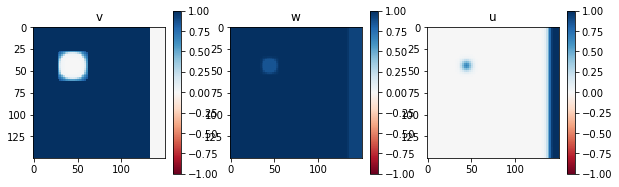

	-Iteration: 60000


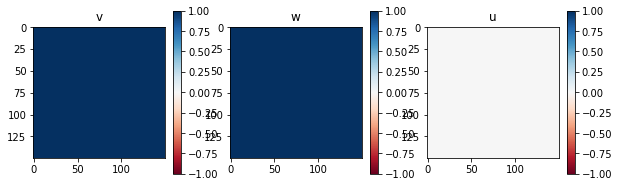

	-Iteration: 100000


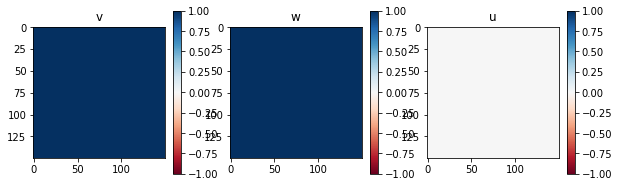

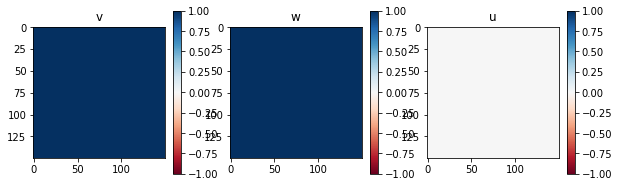

FileNotFoundError: [Errno 2] No such file or directory: 'results/stability/chaotic/dx_0.0800.png'

In [11]:
dxs = [0.08, 0.05, 0.04, 0.03, 0.025, 0.02, 0.015, 0.01, 0.008, 0.006, 0.004]

for dx_test in dxs:
    state = test_stability_chaotic(dx_test, dt)
    fig, ax = model.show(state)
    path = os.path.join("results", "stability", "chaotic", "dx_%.4f.png" % dx_test)
    fig.savefig(path)